# Amazon_ Stock_Price_Forecast_ARIMA

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf 
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.graph_objects as go
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error
import datetime 

In [2]:
data = yf.download("AMZN", start="2012-01-01", end="2022-02-01",group_by="ticker")
print(data)


[*********************100%***********************]  1 of 1 completed
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2012-01-03   175.889999   179.479996   175.550003   179.029999   179.029999   
2012-01-04   179.210007   180.500000   176.070007   177.509995   177.509995   
2012-01-05   175.940002   178.250000   174.050003   177.610001   177.610001   
2012-01-06   178.070007   184.649994   177.500000   182.610001   182.610001   
2012-01-09   182.759995   184.369995   177.000000   178.559998   178.559998   
...                 ...          ...          ...          ...          ...   
2022-01-25  2844.850098  2872.000000  2762.899902  2799.719971  2799.719971   
2022-01-26  2895.000000  2903.699951  2746.370117  2777.449951  2777.449951   
2022-01-27  2816.000000  2884.870117  2787.000000  2792.750000  2792.750000   
2022-01-28  2817.209961  2879.959961  2758.590088  2879.560059

In [3]:
data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [4]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2.537000e+03
mean,1261.767218,1274.825616,1247.107182,1261.259535,1261.259535,4.050254e+06
std,1062.739229,1074.309500,1049.647151,1061.760891,1061.760891,2.184593e+06
min,173.809998,178.250000,172.000000,175.929993,175.929993,8.813000e+05
25%,335.260010,337.500000,331.660004,334.019989,334.019989,2.682300e+06
50%,829.210022,833.780029,822.849976,829.280029,829.280029,3.474700e+06
75%,1841.000000,1853.660034,1822.640015,1843.930054,1843.930054,4.704600e+06
max,3744.000000,3773.080078,3696.790039,3731.409912,3731.409912,2.385610e+07


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2537 entries, 2012-01-03 to 2022-01-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2537 non-null   float64
 1   High       2537 non-null   float64
 2   Low        2537 non-null   float64
 3   Close      2537 non-null   float64
 4   Adj Close  2537 non-null   float64
 5   Volume     2537 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 138.7 KB


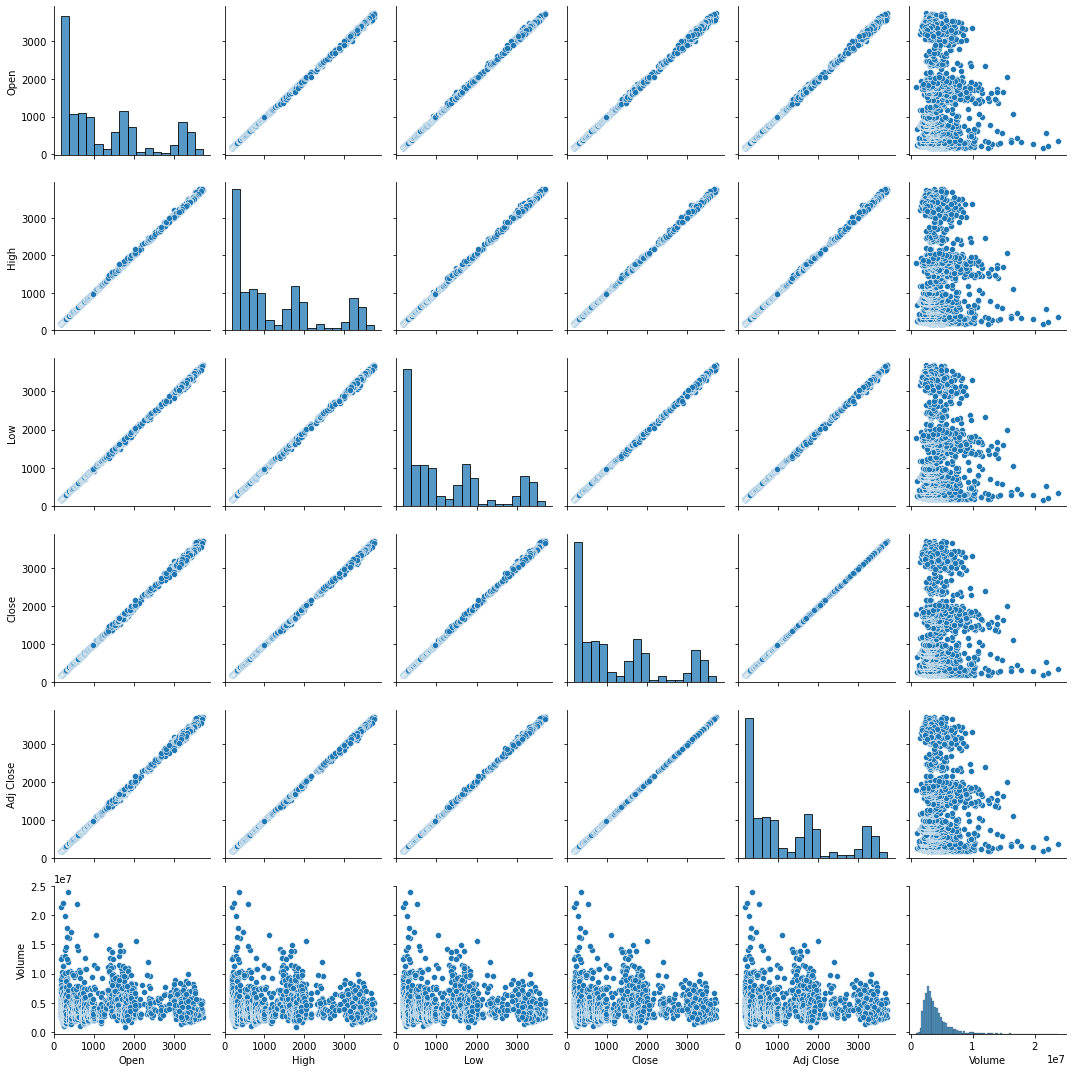

In [6]:
sns.pairplot(data)
plt.tight_layout()

In [7]:
# my target variable will be the Close colonn

Text(0.5, 1.0, 'Price Variation in Decades')

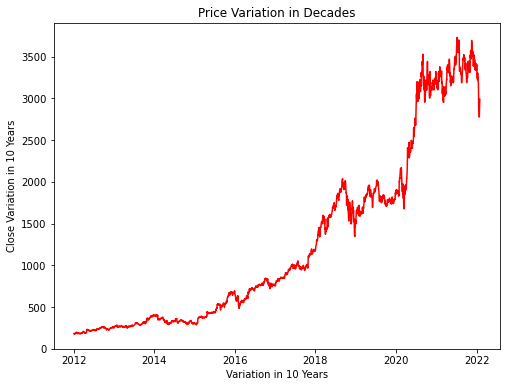

In [8]:
plt.figure(figsize=(8,6))
plt.plot(data['Close'], color = 'red')
plt.xlabel('Variation in 10 Years')
plt.ylabel('Close Variation in 10 Years')
plt.title('Price Variation in Decades')

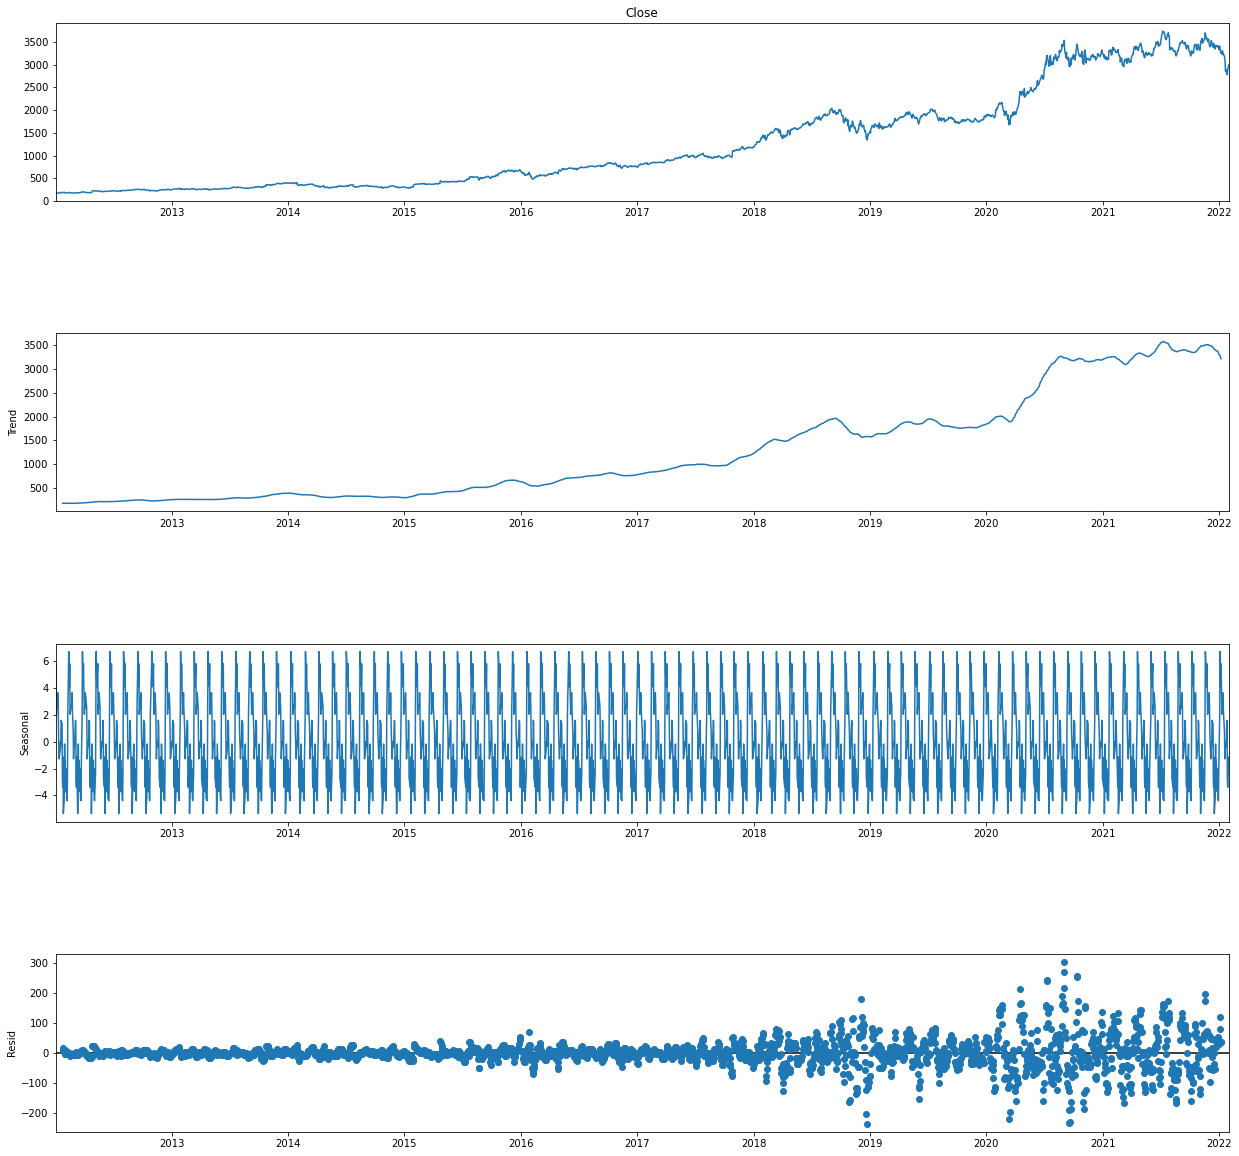

In [9]:
result = seasonal_decompose(data.Close, model='additive', period = 30)
fig = go.Figure()  
fig = result.plot()  
fig.set_size_inches(20, 19)

In [128]:
# we can see that the trend observation increase from 2012 to 2022..

# Check the Stationarity

here we must check the stationarity of the data to build the  ARIMA model.

Stationarity means that the statistical properties of a a time series (or rather the process generating it) do not change over time.

# ADF TEST

In [10]:
series = data['Close'].values

In [11]:
results_1 = adfuller(series, autolag='AIC')

print('ADF Statistic: %f' % results_1[0])

print('p-value: %f' % results_1[1])

print('Critical Values:')

for key, value in results_1[4].items():
    
    print('\t%s: %.3f' % (key, value))
    
if series[0] < results_1[4]["5%"]:
    
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: 0.294639
p-value: 0.977097
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Failed to Reject Ho - Time Series is Non-Stationary


# KPSS TEST

In [12]:
results_2 = kpss(series, regression='c', nlags=None, store=False)

print('kpss Statistic: %f' % results_2[0])

print('p-value: %f' % results_2[1])

print('Critical Values:')

for key, value in results_2[3].items():
    
    print('\t%s: %.3f' % (key, value))
    
if series[0] < results_2[3]["5%"]:
    
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

kpss Statistic: 8.144786
p-value: 0.010000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Failed to Reject Ho - Time Series is Non-Stationary


C:\Users\Mtime\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning:

The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"

C:\Users\Mtime\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




In [13]:
# So here we can deduce that we have Non-Stationary Time Series 

# Detrend Time Series Data With Differencing Method

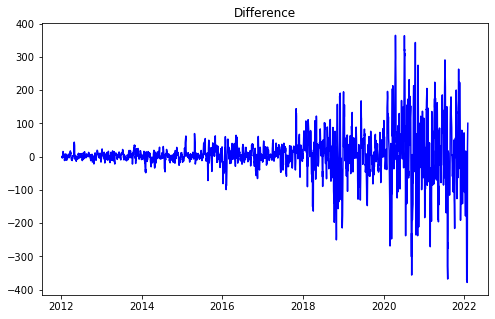

In [14]:
dif_Close = data['Close'].diff(periods=5)
dif_Close.dropna(inplace=True)

fig = plt.figure(figsize=(8,5))
plt.plot(dif_Close, color='blue')
plt.title('Difference')
plt.show()

# ADF Again 

In [15]:
results_1 = adfuller(dif_Close, autolag='AIC')

print('ADF Statistic: %f' % results_1[0])

print('p-value: %f' % results_1[1])

print('Critical Values:')

for key, value in results_1[4].items():
    
    print('\t%s: %.3f' % (key, value))
    
if dif_Close[0] > results_1[4]["5%"]:
    
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -9.945695
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Reject Ho - Time Series is Stationary


# KPSS Again 

In [16]:
results_2 = kpss(dif_Close, regression='c', nlags=None, store=False)

print('kpss Statistic: %f' % results_2[0])

print('p-value: %f' % results_2[1])

print('Critical Values:')

for key, value in results_2[3].items():
    
    print('\t%s: %.3f' % (key, value))
    
if dif_Close[0] < results_2[3]["5%"]:
    
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

kpss Statistic: 0.150331
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Reject Ho - Time Series is Stationary


C:\Users\Mtime\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning:

The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"

C:\Users\Mtime\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




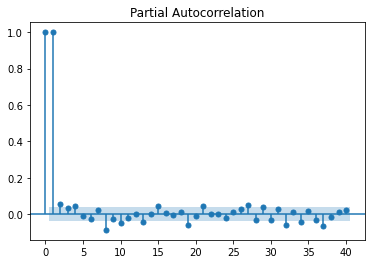

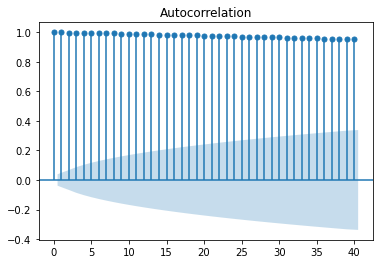

In [17]:
pacf = plot_pacf(data['Close'].dropna(), lags=40)
acf = plot_acf(data['Close'].dropna(), lags=40)

# Auto-Regressive Integrated Moving Average (ARIMA)


In [19]:
train_data, test_data = dif_Close[0:int(len(dif_Close)*0.8)], dif_Close[int(len(dif_Close)*0.8):]


In [20]:
arima_model = auto_arima(train_data,
                      start_p=1, start_q=1,
                      max_p=5, max_q=5,
                      test='adf',        
                      trace=True,
                      alpha=0.05,
                      scoring='mse',
                      suppress_warnings=True,
                      seasonal = False
                      )

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=18455.299, Time=2.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=20459.312, Time=0.30 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=18469.280, Time=0.76 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=19255.283, Time=1.39 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=18397.318, Time=5.07 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=18451.679, Time=1.48 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=18385.353, Time=5.29 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=18431.995, Time=2.30 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=18338.007, Time=5.27 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=18352.039, Time=1.89 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=18146.282, Time=7.23 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=18286.032, Time=3.37 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=17931.150, Time=11.36 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=21.68 sec
 ARIMA(5,0,3)(0,0,0)[0]

In [50]:
model = ARIMA(train_data, order=(5, 0, 2))
fitted = model.fit(disp=-1)


C:\Users\Mtime\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [25]:
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Close   No. Observations:                 2025
Model:                     ARMA(5, 2)   Log Likelihood               -8954.700
Method:                       css-mle   S.D. of innovations             20.134
Date:                Sun, 27 Feb 2022   AIC                          17927.399
Time:                        20:44:25   BIC                          17977.919
Sample:                             0   HQIC                         17945.937
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.1154      1.700      2.421      0.015       0.783       7.448
ar.L1.Close    -0.3270      0.040     -8.114      0.000      -0.406      -0.248
ar.L2.Close     0.3536      0.025     14.168      0.000       0.305       0.403
ar.L3.Close     0.5029      0.023     22.241      0.000       0.459       0.547
ar.L4.Close     0.0149      0.022      0.661      0.508      -0.029       0.059
ar.L5.Close    -0.3652      0.027    -13.463      0.000      -0.418      -0.312
ma.L1.Close     1.3356      0.045     29.733      0.000       1.248       1.424
ma.L2.Close     0.7846      0.031     24.909      0.000       0.723       0.846
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.2095           -0.0000j            1.2095           -0.5000
AR.2           -0.5950           -0.9767j            1.1436           -0.3371
AR.3           -0.5950           +0.9767j            1.1436            0.3371
AR.4            1.2201           -0.4923j            1.3157           -0.0610
AR.5            1.2201           +0.4923j            1.3157            0.0610
MA.1           -0.8512           -0.7417j            1.1290           -0.3859
MA.2           -0.8512           +0.7417j            1.1290            0.3859
-----------------------------------------------------------------------------
"""

In [37]:
step = 30
fc, se, conf = fitted.forecast(step)  # 95% confidence

In [38]:
fc

array([-31.84319034, -28.38071445, -12.68091322,  -5.81869657,
         0.1992901 ,   6.08342034,   8.70791088,   7.32618469,
         9.24890132,   7.34139569,   5.84046425,   5.6446578 ,
         4.75171592,   3.48911291,   4.16191898,   3.59153314,
         3.43920993,   3.93296441,   3.90186942,   3.75587858,
         4.24695281,   4.08208865,   4.05547295,   4.26202346,
         4.16277699,   4.0731113 ,   4.23101443,   4.1105542 ,
         4.08378649,   4.16425816])

In [40]:
fc = pd.Series(fc, index=test_data[:step].index)
lower_series = pd.Series(conf[:, 0], index=test_data[:step].index)
upper_series = pd.Series(conf[:, 1], index=test_data[:step].index)

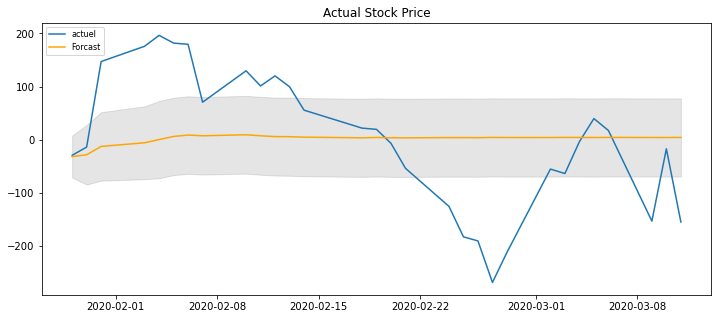

In [44]:

plt.figure(figsize=(12,5))
plt.plot(test_data[:step], label='actuel')
plt.plot(fc, color = 'orange',label='Forcast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)